In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22, 'lines.linewidth':3 ,
                     'figure.figsize':(10,10),'axes.grid':True,
                     'font.size':20, 'figure.figsize':(10,10),
                     'lines.markersize':10})
# plt.rc('text', usetex=True)
def plot_smth(x,y,xlab=None,ylab=None,scat=False):
    fig, ax = plt.subplots()
    if scat:
        ax.plot(x,y,'ro')
    else:
        ax.plot(x,y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    return ax

# Problem Set 6

## **Problem 1.**

Given the data: 

| $x_i$ | 0 | 1 | 2 | 3 | 5 | 
| --- | --- | --- | --- | --- | --- |
| $y_i$ | 1 | 3 | 3 | 4 | 6 |,

(a) Find the best linear fit by solving the $2 \times 2$ normal system by hand $A^TAu=A^Tb$, with $A= [x^T \quad 1]$ and $b=y^T$. Plot the data and the fit.

(b) Calculate the Moore-Penrose pseudo-inverse $A^+$ of $A$ directly from its definition.

(c) Write down the SVD of $A^+$.

(d) What is the error vector $e$ of the approximation and its 2-norm?

**Solution.**

In [2]:
x = np.array([0, 1, 2, 3, 5])
y = np.array([1, 3, 3, 4, 6])

A = np.array([x**i for i in [0, 1]]).T # Vandermonde matrix
N = A.T @ A # normal matrix
b = A.T @ y # right-hand side of the normal equation
print("Normal matrix\n", N, "\n\n", "Right-hand side\n", b)

Normal matrix
 [[ 5 11]
 [11 39]] 

 Right-hand side
 [17 51]


$$
  x = N^{-1}A^Tb = \frac{1}{74}
  \begin{pmatrix}
    39 & -11\\
    -11 & 5
  \end{pmatrix}
  \begin{pmatrix}
    17\\
    51
  \end{pmatrix} = \frac{1}{74}
  \begin{pmatrix}
    102\\
    68
  \end{pmatrix}.
$$

So the best fit in the least squares sense is $y(x) = \frac{102}{74} + \frac{68}{74}x$

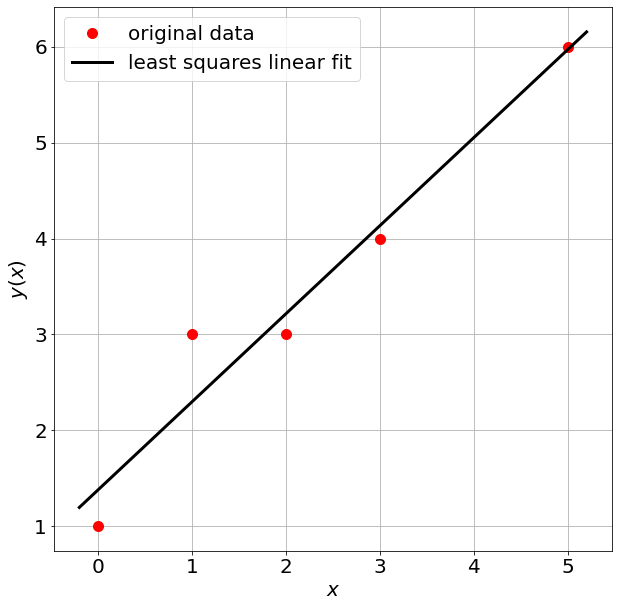

In [3]:
plt.plot(x, y, "o", label="original data", color='r')
plt.plot(np.linspace(-0.2, 5.2), (102 + 68*np.linspace(-0.2, 5.2))/74, 
         label="least squares linear fit", color='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$y(x)$")
plt.legend();

(b) $A^+ = \left(A^T A\right)^{-1}A^T$. We already computed $\left(A^TA\right)^{-1}$

$$
  A^{\dagger} = \frac{1}{74}
  \begin{pmatrix}
    39 & -11\\
    -11 & 5
  \end{pmatrix}
  \begin{pmatrix}
    1&1&1&1&1\\
    0&1&2&3&5
  \end{pmatrix} = \frac{1}{74}
  \begin{pmatrix}
    39 & 28 & 17 & 6 & -16 \\
    -11 & -6 & -1 & 4 & 14
  \end{pmatrix}.
$$

(c) See the code below

In [4]:
A_pinv = 1/74*np.array([[39, 28, 17, 6, -16], [-11, -6, -1, 4, 14]])
U, Sigma, VT = np.linalg.svd(A_pinv, full_matrices=False)
print("U\n", U, "\n\nSingular values: ", Sigma, "\n\nV\n", VT.T)

U
 [[-0.95905426  0.28322239]
 [ 0.28322239  0.95905426]] 

Singular values:  [0.75559585 0.15384896] 

V
 [[-0.72465742  0.04357347]
 [-0.51065576  0.19112298]
 [-0.2966541   0.33867248]
 [-0.08265244  0.48622198]
 [ 0.34535089  0.78132099]]


(d) The compomemts of the error vector are  $e_i = y(x_i) - y_i$.

\begin{equation}
  e = \frac{1}{74}
  \begin{pmatrix}
    28\\
    -52\\
    16\\
    10\\
    -2\\
  \end{pmatrix}
\end{equation}

In [5]:
e = np.array([28, -52, 16, 10, -2])/74
l2norm = np.linalg.norm(e)
print(f"L2 norm of the error = {l2norm:.4}")

L2 norm of the error = 0.8383


## **Problem 2.**

Find the best plane in $\mathbb{R}^3$, in the least-squares sense, through the data given in the table:

|$x_i$|1|1|2|3|5|
| --- | --- | --- | --- | --- | --- |
|$y_i$|5|3|4|10|7|
|$z_i$|2|1|2|5|5|


What is the error vector and its norm?

**Solution.**

The equation for the required plane is $z(x, y) = ax + by + c$. To find the unknown $a$, $b$, and $c$, we need to solve the least squares problem $Au = z$ with 
$$
u = \begin{pmatrix} a \\ b \\ c \end{pmatrix}, A = \begin{pmatrix} 1&5&1  \\ 1&3&1 \\ 2&4&1 \\ 3&10&1 \\ 5&7&1 \end{pmatrix}, z = \begin{pmatrix} 2 \\ 1 \\ 2 \\ 5 \\ 5 \end{pmatrix}
$$

In [6]:
x = np.array([1, 1, 2, 3, 5])
y = np.array([5, 3, 4, 10, 7])
z = np.array([2, 1, 2, 5, 5])

A = np.vstack([x, y, np.ones_like(x)]).T
a,b,c = np.linalg.pinv(A) @ z
print(f'a = {a:.3}, b = {b:.3}, c = {c:.3}.')
print(f'error = {a*x+b*y+c-z}')
l2norm = np.linalg.norm(a*x+b*y+c-z)
print(f"L2 norm of the error = {l2norm:.4}")

a = 0.568, b = 0.407, c = -0.722.
error = [-0.12093023  0.06604651  0.04093023  0.04837209 -0.0344186 ]
L2 norm of the error = 0.1555


## **Problem 3.**

Determine the dominant modes in the function $f$ of space $x$ and time $t$ : $f(x,t) =e^{−x^2}\sin (x+ 3t) \cos (x−t)$, considering the interval $x\in[−5,5]$, $t\in[0,10]$.

(a) Plot the singular values in uniform as well as semilog scales.

(b) Plot the solution in the $x-t$ plane over the given interval.

(c) How much “energy” of the solution is contained in mode $1$ and in modes $1+2$?

(d) Plot the first two columns of $U$ and $V$ in the SVD of matrix $F$ obtained by calculating $f(x,t)$ over a grid with $100$ points in $x$ and $50$ points in $t$. Explain their meaning.

**Solution.** 

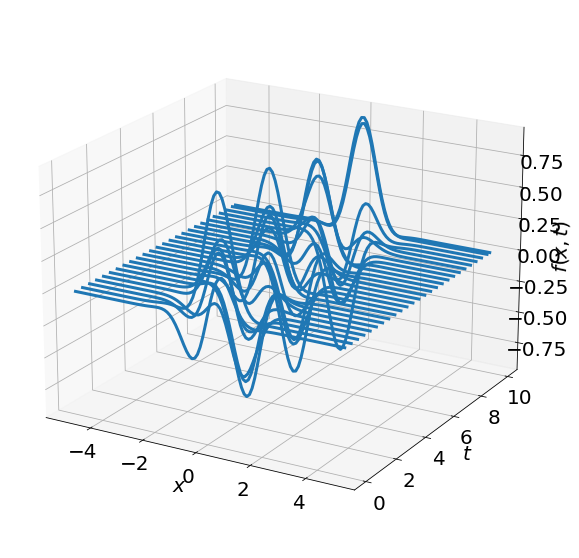

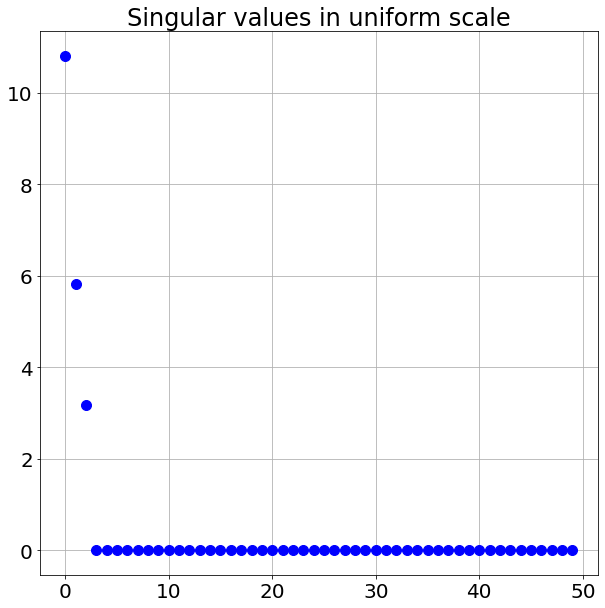

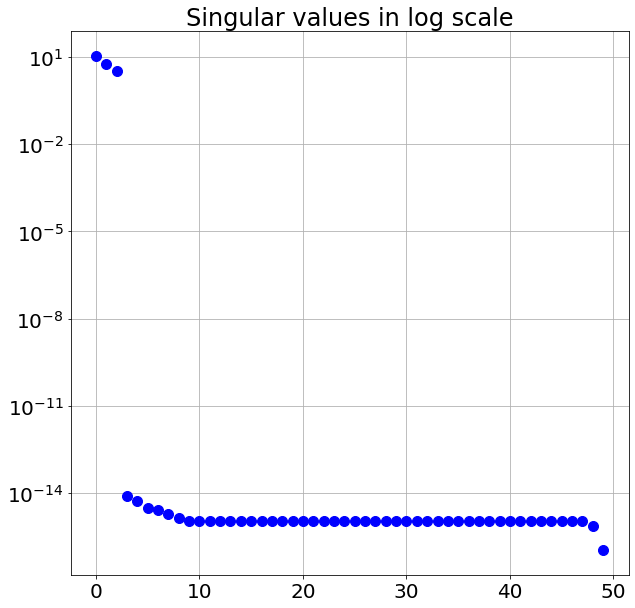

In [8]:
from mpl_toolkits.mplot3d import axes3d
x = np.linspace(-5,5,100);
t = np.linspace(0,10,50);
xx, tt = np.meshgrid(x,t);

f0 = lambda x,t : np.exp(-x*x)*np.sin(x+3*t)*np.cos(x-t)
f = f0(xx,tt)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(xx,tt,f,rstride=2,cstride=0)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$f(x,t)$')
ax.view_init(20, 300)

[u, s, v] = np.linalg.svd(f.T);
fig,ax = plt.subplots()
ax.plot(s,'bo')
ax.set_title('Singular values in uniform scale')
fig,ax = plt.subplots()
ax.plot(s,'bo')
ax.set_yscale('log')
ax.set_title('Singular values in log scale');

In [9]:
print(f'Energy in the first mode: {s[0]/sum(s):.3f}')
print(f'Energy in the first two modes: {(s[0]+s[1])/sum(s):.3f}')

Energy in the first mode: 0.546
Energy in the first two modes: 0.840


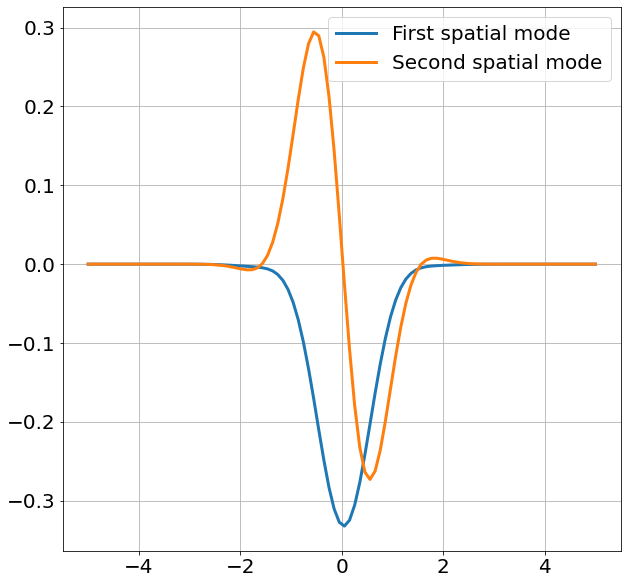

In [10]:
# U columns
fig, ax = plt.subplots()
ax.plot(x, u[:,0],label='First spatial mode')
ax.plot(x, u[:,1],label='Second spatial mode');
ax.legend();

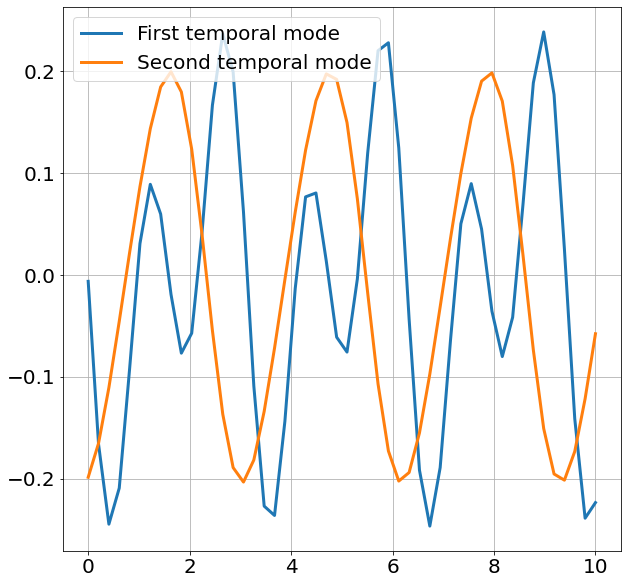

In [11]:
# V columns
fig, ax = plt.subplots()
ax.plot(t, v[0,:],label='First temporal mode')
ax.plot(t, v[1,:],label='Second temporal mode');
ax.legend(loc='upper left');

These modes determine dominant (most energetic) coherent motions of the wave in space and time that can be used to reconstruct or approximate the initial complex data. More examples and inrerpretations can be found [here.](https://depositonce.tu-berlin.de/bitstream/11303/9456/5/podnotes_aiaa2019.pdf)

## **Problem 4.** 

To find a root of $f(x) = 0$, Newton’s method tells to start with some initial guess $x_0$ and then to iterate following the scheme: $x_{n+1}=x_n−f(x_n)/f′(x_n)$.

(a) Use this method to find the root $x = 1$ of $f(x) = x^2−1$.

(b) What is the range of initial conditions $x_0$ that give convergence to $x= 1$?

(c) How fast do the iterations converge? Plot the error $e_n=|x_n−1|$ as a function of $n$ (maybe, in log scale).

**Solution.**
(a)+(c) Newton's method for $f(x) = x^2−1$: $x_{n+1}=x_n−(x_n^2−1)/2x_n = (x^2_n+1)/2x_n$. Error plots reveal the quadratic convergence.

Root with the tolerance 1e-06: x_5 = 1.000000000000001


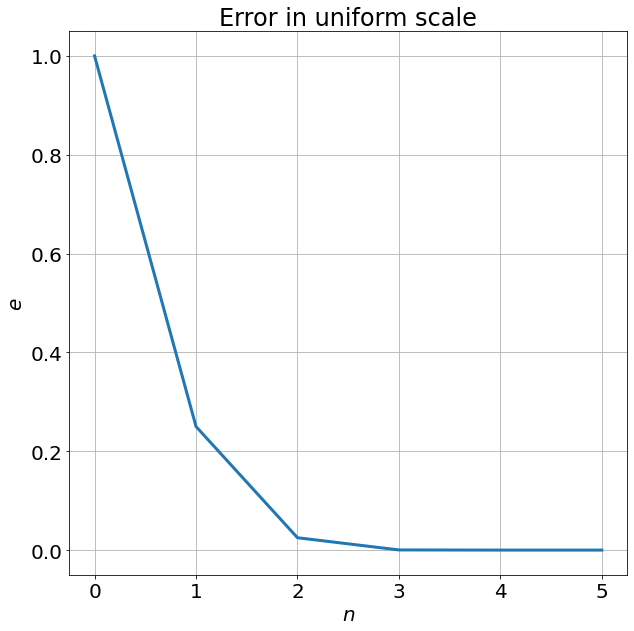

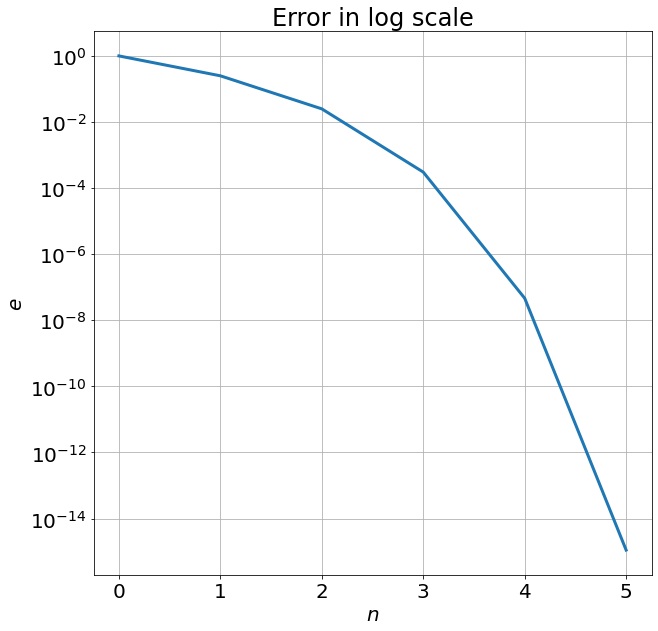

In [12]:
def x_sqm1_iters(x):
    return (x**2+1)/2./x
    
    
def Newton(initial_guess, tolerance=1e-6, iter_func=x_sqm1_iters):
    x0, tol = initial_guess, tolerance
    x1 = iter_func(x0)
    iter_list = [x0,x1]
    count = 1 # Counter for iterations
    max_iter = 100
    # Loop till x_n - x_{n+1} is small...
    while np.abs(x1-x0)>tol:
        x0 = x1
        x1 = iter_func(x0)
        iter_list.append(x1)
        count += 1
        # ... or till there are a lot of iterations
        if count > max_iter:  
            break 
    return iter_list

x0, tol = 2, 1e-6
iters = Newton(x0, tol)
err = np.abs(np.array(iters) - 1.)
print(f"Root with the tolerance {tol:.0e}: x_{len(iters)-1} = {iters[-1]}")
ax_err = plot_smth(range(len(err)),err,'$n$','$e$')
ax_err.set_title('Error in uniform scale')
ax_err.set_xticks(range(len(err)))
ax_err = plot_smth(range(len(err)),err,'$n$','$e$')
ax_err.set_yscale('log')
ax_err.set_title('Error in log scale')
ax_err.set_xticks(range(len(err)));

(b) To find the range of initial conditions that converge to the root $x=1$, we can run the method for a discrete set of initial conditions, for example, from the interval $[-10, 10]$ and check the result of the iterations: 

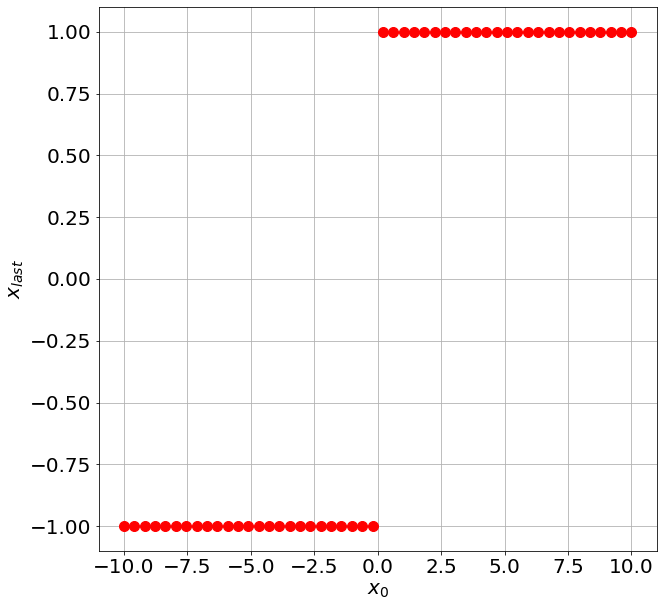

In [13]:
init_range = np.linspace(-10,10)
roots = np.zeros_like(init_range)
for i,x0 in enumerate(init_range):
    roots[i] = Newton(x0)[-1]
plot_smth(init_range, roots, xlab='$x_0$',ylab='$x_{last}$',scat=1);

## **Problem 5.**

Now apply the same Newton iterations as in the previous problem to the equation $f(x) = x^2 + 1 = 0$. Clearly, this equation has no real roots.

(a) The question is: What do the iterations do? Do they converge to anything?

(b) How does the behavior of the iterations depend on the initial point $x_0$?

(c) What if you start the iterations in the complex plane? Can you get convergence to the actual roots $\pm i$ of the equation? What are the domains of attraction of the roots?

**Solution.** (a)+(b) Newton's method gives $x_{n+1}=x_n−(x_n^2+1)/2x_n = (x^2_n-1)/2x_n$. No convergence for the real initial guesses. And there is no explicit dependency of the itereations behaviour.

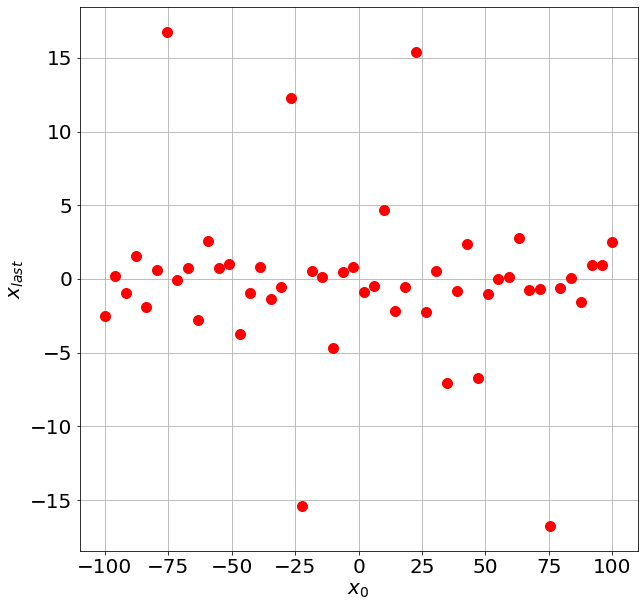

In [14]:
def x_sqp1_iters(x):
    return (x**2-1)/2./x
    
init_range = np.linspace(-100,100)
roots = np.zeros_like(init_range)
for i,x0 in enumerate(init_range):
    roots[i] = Newton(x0,iter_func=x_sqp1_iters)[-1]
plot_smth(init_range, roots, xlab='$x_0$',ylab='$x_{last}$',scat=1);

(c) If initial guess $x_0$ has a positive imaginary part, then the iterations converge to the root $i$. The outcome is $-i$, if $\rm{Im} \ x_0 <0$.

<ipython-input-15-bf77eb479a92>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(Real,Imag,np.imag(roots))


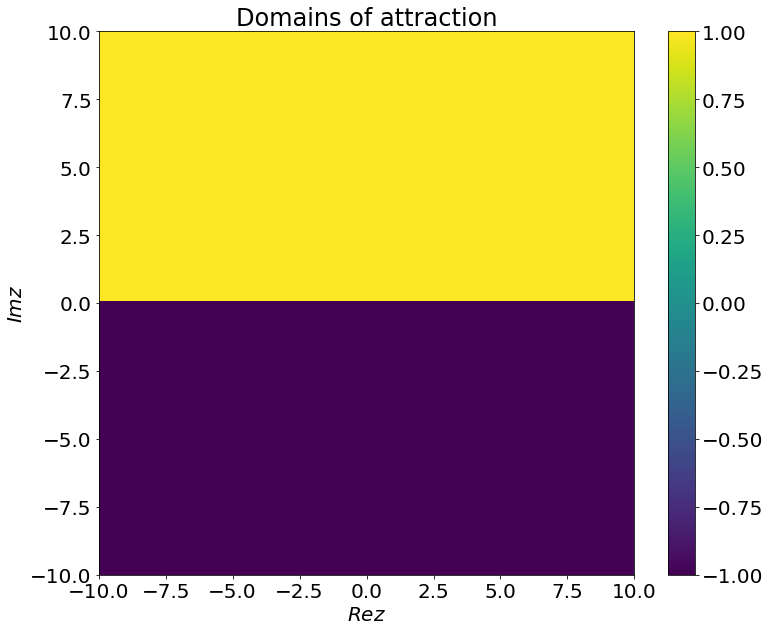

In [15]:
real_range = np.linspace(-10,10,100)
imag_range = real_range
Real, Imag = np.meshgrid(real_range, imag_range)
roots = np.zeros_like(Real,dtype=np.complex)
for i,Re in enumerate(real_range):
    for k,Im in enumerate(imag_range):
        roots[k,i] = Newton(Re+Im*1j, iter_func=x_sqp1_iters)[-1]
fig,ax = plt.subplots(figsize=(12,10))
im = ax.pcolormesh(Real,Imag,np.imag(roots))
ax.set_xlabel(r'$Re z$')
ax.set_ylabel(r'$Im z$')
ax.set_title('Domains of attraction')
fig.colorbar(im,ax=ax);

In [16]:
pos_imag = Newton(5+0.00001j,iter_func=x_sqp1_iters)[-1]
neg_imag = Newton(5-0.00001j,iter_func=x_sqp1_iters)[-1]
print(f"""Result for the initial guess with a small positive imaginary part: {np.real(pos_imag):.2e}+{np.imag(pos_imag):.2f}i\n
Result for the initial guess with a small negative imaginary part: {np.real(neg_imag):.2e}{np.imag(neg_imag):.2f}i""")

Result for the initial guess with a small positive imaginary part: 2.54e-23+1.00i

Result for the initial guess with a small negative imaginary part: 2.54e-23-1.00i


## **Problem 6.** 

Consider the function $f= 2x^2+ 2xy+y^2−x−2y$.

(a) Find its minimum analytically by representing $f$ as $\frac 12 u^TAu−b^Tu$. Plot the function together with its contour levels using, for example, `surfc` function in Matlab.

(b) Now find the minimum using the gradient descent. Determine the step $\tau$ in the descent method.

(c) Starting with $(x0,y0) = (0,4)$, calculate the first two steps of the gradient descent explicitly and indicate on a single plot both the positions and the gradient vectors at those positions. Also plot the level curves of $f$ going through these points.

(d) Implement the descent algorithm in Matlab or Python and starting with the same initial condition as in (c) find the minimum within a tolerance of $tol = 10^{−6}$. How many iterations does it take to reach the minimum?

**Solution.** (a) $f = \frac 12 u^TAu−b^Tu$ with 
$$ u = \begin{pmatrix} x \\ y\end{pmatrix}, \quad A = \begin{pmatrix} 4 & 2 \\ 2 & 2 \end{pmatrix}, \quad b = \begin{pmatrix} 1 \\ 2\end{pmatrix}.$$
Then, the minimum $f_{min} = b^Tu_{min} = - \frac{5}{4}$ is reached at $u_{min} = A^{-1}b = \begin{pmatrix} -\frac{1}{2}  & \frac 32 \end{pmatrix}^T$  

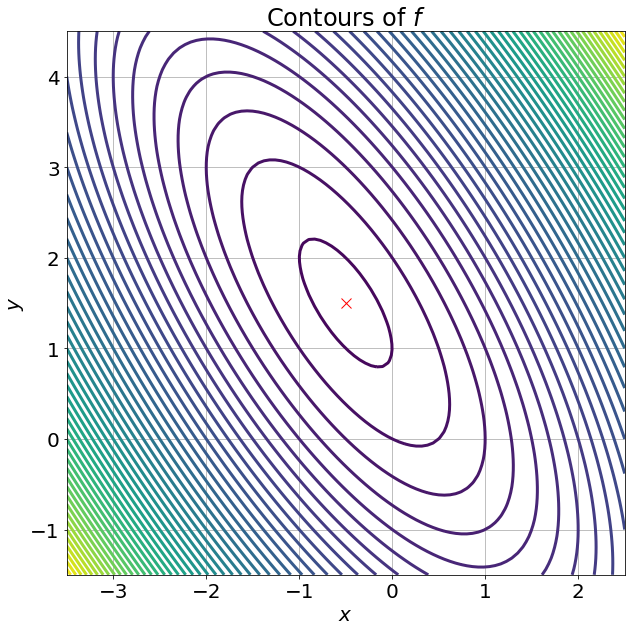

In [17]:
u_min = np.array([-1/2, 3/2])
pad = 3.
xrange = np.linspace(u_min[0]-pad,u_min[0]+pad,100)
yrange = np.linspace(u_min[1]-pad,u_min[1]+pad,100)
xx, yy = np.meshgrid(xrange,yrange)
f = 2*xx*xx+2*xx*yy+yy*yy-xx-2*yy
plt.contour(xx,yy,f,50)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Contours of $f$')
plt.plot(*u_min,'rx');

(b) According to the method of gradient descent, $u_{n+1} = u_n - \tau \nabla f (u_n)$ with $\nabla f(u_n)\cdot\nabla f(u_{n+1})=0$. Here, we have using that $A^T=A$
$$
\nabla f (u) = \begin{pmatrix} 4x + 2y -1 \\ 2x + 2y -2 \end{pmatrix} = Au - b \Rightarrow u_{n+1} = u_n - \tau \begin{pmatrix} 4x_n + 2y_n -1 \\ 2x_n + 2y_n -2 \end{pmatrix} = \left( I -   \tau A  \right) u_n + \tau b  
$$

$$
\nabla f(u_n)\cdot\nabla f(u_{n+1}) = \begin{pmatrix} 4x_n + 2y_n -1 \\ 2x_n + 2y_n -2 \end{pmatrix}^T \cdot \begin{pmatrix} 4x_{n+1} + 2y_{n+1} -1 \\ 2x_{n+1} + 2y_{n+1} - 2 \end{pmatrix} = \left( Au_n - b \right)^T\left( Au_{n+1} - b \right) = u_n^TA^2u_{n+1} - u_n^TAb -b^TAu_{n+1} + b^Tb = 
$$

$$
= \left( u_n^TA^2  - b^TA \right) \left(u_n -   \tau A  u_n + \tau b  \right) + b^Tb - u_n^TAb = \tau \left( u_n^TA^2  - b^TA \right)\left(b -  A  u_n  \right) + \left( u_n^TA^2  - b^TA \right) u_n   + b^Tb - u_n^TAb = 0
$$

$$
 = 0 \Rightarrow \tau = \frac{\left( u_n^TA^2  - b^TA \right) u_n   + b^Tb - u_n^TAb}{\left( u_n^TA^2  - b^TA \right)\left( A  u_n  - b\right)} = 
 \frac{\left( A u_n - b \right)^T\left( A u_n - b\right)}{\left( Au_n  - b \right)^TA\left( A  u_n - b  \right)}
$$

(c) If $u_0 = \begin{pmatrix}0 & 4 \end{pmatrix} ^T$, then $\tau = 0.195$ and 
$$
u_1 = \begin{pmatrix} 1-4\tau & -2\tau  \\ - 2\tau  & 1-2\tau \end{pmatrix}\begin{pmatrix}0 \\ 4 \end{pmatrix} + \tau \begin{pmatrix}1\\ 2 \end{pmatrix}  = \begin{pmatrix}-1.365\\ 2.830 \end{pmatrix}
$$
And then $\tau = 1.149$
$$
u_2 = \begin{pmatrix} 1-4\tau & -2\tau  \\ - 2\tau  & 1-2\tau \end{pmatrix}u_1 + \tau \begin{pmatrix}1\\ 2 \end{pmatrix}  = \begin{pmatrix} -0.448 \\ -1.761\end{pmatrix}
$$

In [18]:
# Calculate u_{n+1} from u_n and return the step, gradient(u_n) and u_{n+1}
def next_u(u):
    A = np.array([[4,2],[2,2]])
    b = np.array([1,2]).reshape(2,1)
    grad = A @ u - b
    nom = grad.T @ grad
    denom = grad.T @ A @ grad
    tau = nom/denom
    tau = tau[0,0]
    return tau, grad, (np.eye(2)-tau*A)@u+tau*b

In [19]:
u0 = np.array([0,4]).reshape(2,1)
tau0,grad0,u1 = next_u(u0)
tau1,grad1,u2 = next_u(u1)
tau2,grad2,u3 = next_u(u2)

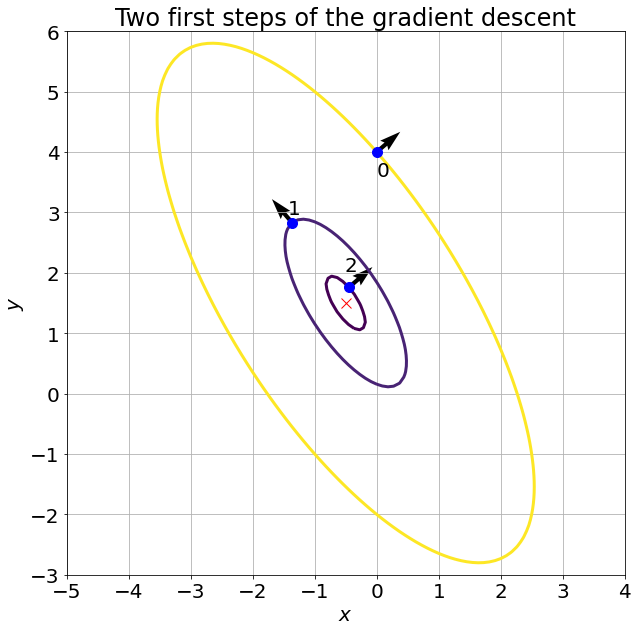

In [20]:
def func(x,y):
    return 2*x*x+2*x*y+y*y-x-2*y
u_min = np.array([-1/2, 3/2])
pad = 4.5
xrange = np.linspace(u_min[0]-pad,u_min[0]+pad,100)
yrange = np.linspace(u_min[1]-pad,u_min[1]+pad,100)
xx, yy = np.meshgrid(xrange,yrange)
f = func(xx,yy)
plt.contour(xx,yy,f,levels=sorted([func(*u0)[0],func(*u1)[0],func(*u2)[0]]))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Two first steps of the gradient descent')
plt.plot(*u_min,'rx');
plt.plot(*u0,'bo'), plt.text(*u0*0.9, '0'), plt.quiver(*u0, *grad0)
plt.plot(*u1,'bo'), plt.text(*u1*1.05, '1'), plt.quiver(*u1, *grad1)
plt.plot(*u2,'bo'), plt.text(*u2*1.15, '2'), plt.quiver(*u2, *grad2);

(d) See the following code snippet

In [21]:
tol = 1e-6
u0 = np.array([0,4]).reshape(2,1)
_,_,u1 = next_u(u0)
iter_count = 1
while abs(func(*u0)-func(*u1))>tol:
    _,_,u2 = next_u(u1)
    u0,u1 = u1,u2
    iter_count += 1
print(f"""Algorithm converges after {iter_count} iterations. 
Found minimum with tolerance {tol:.0e} is equal to {func(*u1)[0]:.7f} and is reached at (x,y) = ({u1[0,0]:.7f}, {u1[1,0]:.7f})""")

Algorithm converges after 9 iterations. 
Found minimum with tolerance 1e-06 is equal to -1.2500000 and is reached at (x,y) = (-0.5001022, 1.5001572)
